# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

df = pd.read_csv('previsao_de_renda.csv')

# Analisar a renda por posse de veículo
renda_veiculo = [df['renda'][df['posse_de_veiculo'] == True], df['renda'][df['posse_de_veiculo'] == False]]
f_veiculo, p_veiculo = stats.f_oneway(*renda_veiculo)

# Analisar a renda por posse de imóvel
renda_imovel = [df['renda'][df['posse_de_imovel'] == True], df['renda'][df['posse_de_imovel'] == False]]
f_imovel, p_imovel = stats.f_oneway(*renda_imovel)

# Resultados
print(f"Teste ANOVA para posse de veículo: F={f_veiculo}, p={p_veiculo}")
print(f"Teste ANOVA para posse de imóvel: F={f_imovel}, p={p_imovel}")

Teste ANOVA para posse de veículo: F=60.55538228132242, p=7.618601898643938e-15
Teste ANOVA para posse de imóvel: F=13.355036989355876, p=0.00025860879288767665


Os resultados da análise indicam que a posse de veículo e a posse de imóvel são bons preditores da renda. O teste ANOVA para a posse de veículo revelou um valor de F de 60.56 e um valor de p extremamente baixo (7.62e-15), sugerindo uma diferença significativa nas médias de renda. Para a posse de imóvel, o valor de F foi de 13.36, com um valor de p de 0.00026, também indicando uma diferença estatisticamente significativa. Assim, ambas as variáveis têm um impacto relevante na variação da renda.

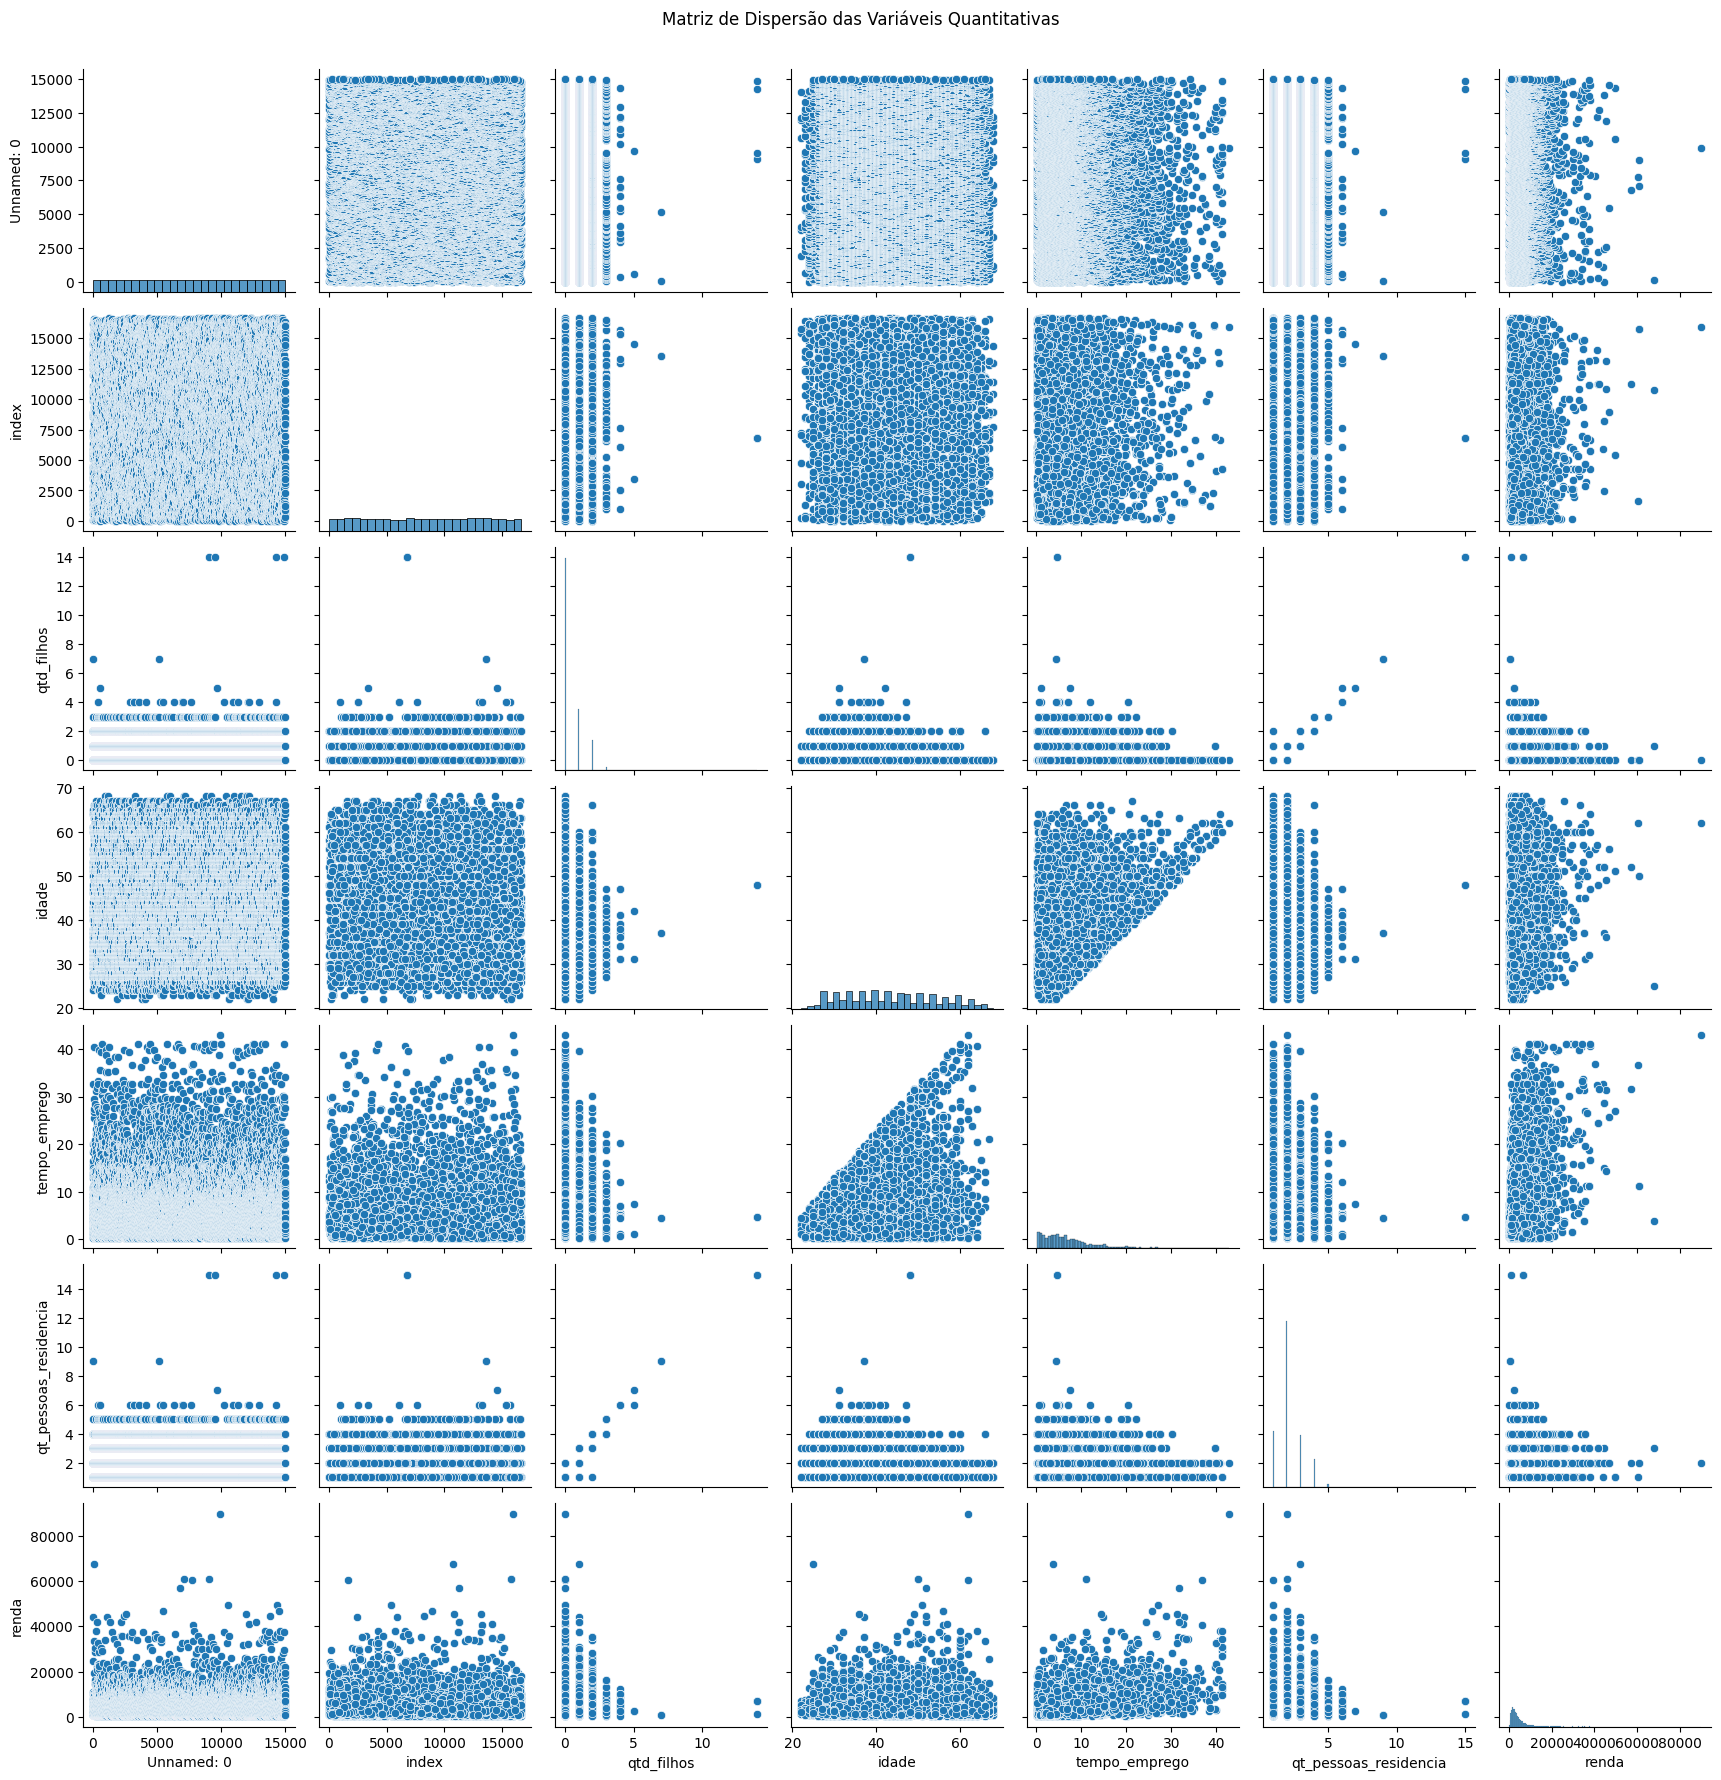

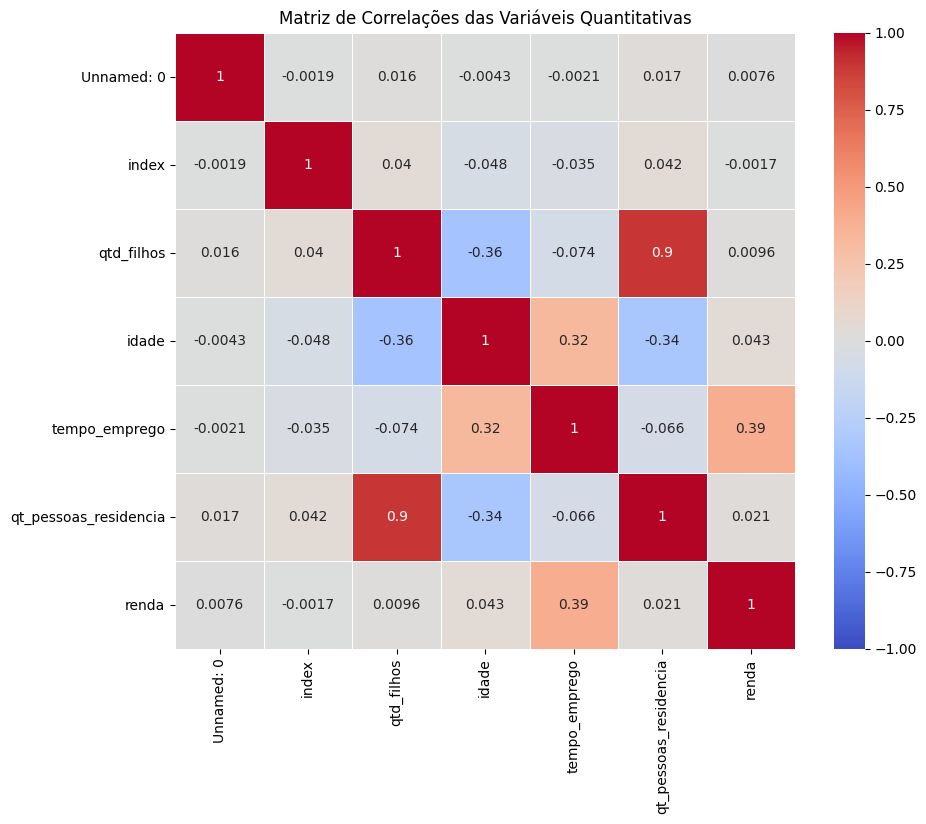

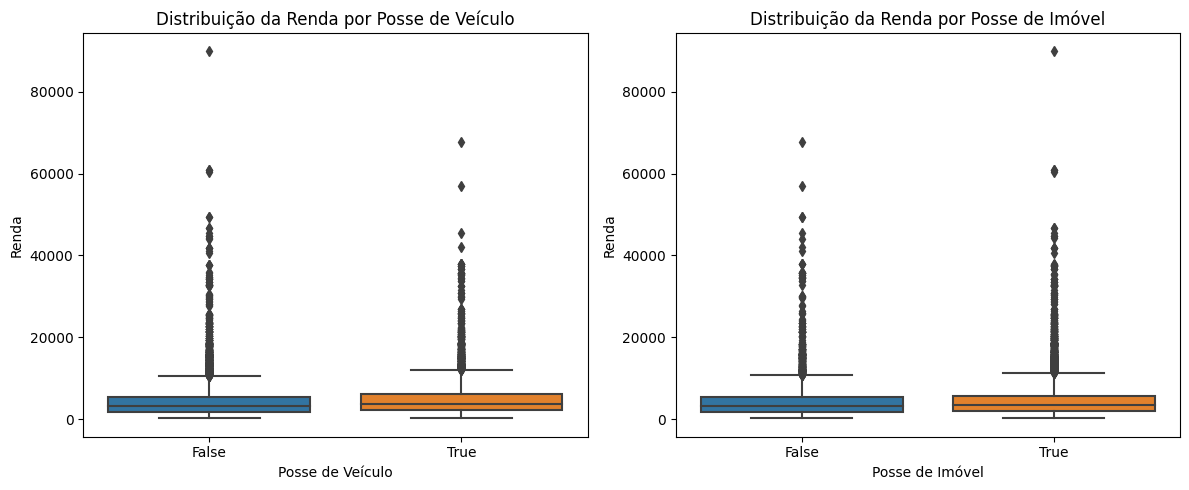

In [8]:
# Selecionar apenas as colunas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Matriz de dispersão (Scatter Matrix) apenas para variáveis numéricas
sns.pairplot(df_numeric)
plt.suptitle('Matriz de Dispersão das Variáveis Quantitativas', y=1.02)
plt.show()

# Matriz de correlação
correlation_matrix = df_numeric.corr()

# Visualização gráfica da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matriz de Correlações das Variáveis Quantitativas')
plt.show()

# Gráficos para as variáveis qualitativas em relação à renda
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot para posse de veículo
sns.boxplot(x='posse_de_veiculo', y='renda', data=df, ax=axs[0])
axs[0].set_title('Distribuição da Renda por Posse de Veículo')
axs[0].set_xlabel('Posse de Veículo')
axs[0].set_ylabel('Renda')

# Boxplot para posse de imóvel
sns.boxplot(x='posse_de_imovel', y='renda', data=df, ax=axs[1])
axs[1].set_title('Distribuição da Renda por Posse de Imóvel')
axs[1].set_xlabel('Posse de Imóvel')
axs[1].set_ylabel('Renda')

# Exibir os gráficos
plt.tight_layout()
plt.show()